# **Homework 2 - Videogames Reviews**

*Group#12*

- **Marco Zimmatore** - [zimmatore.1947442@studenti.uniroma1.it](zimmatore.1947442@studenti.uniroma1.it)
- **Camilla Labbate** - [camillalabbate02@icloud.com](camillalabbate02@icloud.com)
- **Francesco De Martino** - [Demartino.1908303@studenti.uniroma1.it](Demartino.1908303@studenti.uniroma1.it)
- **Alessandro Querqui** - [querqui.2031384@studenti.uniroma1.it](querqui.2031384@studenti.uniroma1.it)

### **Libraries**

In [61]:
#Import The Libraries to manage and plot data
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import functions
import numpy as np
import seaborn as sns
import importlib


In [111]:
#To avoid to restart the kernel whenever we change a function 
importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Marco\\Desktop\\Data Science Magistrale\\ADM\\ADM-HW2\\ADM-HW2\\functions.py'>

---
### **[RQ1] - Exploratory Data Analysis (EDA)**
---

 EDA is a fundamental step to gain a clear view of the data, identify any anomalies, trends, correlations, and structure the dataset for further analysis.

Fitst of all, we load the csv file into a DataFrame 

In [41]:
df = pd.read_csv("../steam_reviews.csv", header="infer", index_col = 0)

Then drop the duplicates mantaining the same values of the dataset's keys \['app_id','review_id'\]


In [45]:
df = df.drop_duplicates(subset=['app_id', 'review_id'])


#### **1. Exploring the Dataset**

Before doing further analysis, we want to understand the data. To do that, we can inspect the first rows of the dataset, check the dataset dimensions, identify the data types of each columns or count missing values.

We use the function **head()** to print the first 3 rows of our *DataFrame*.

In [43]:
#Print the first Three Rows of the DataFrame
df.head(3)


,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09


In the Function `explore(df)` we print the following infos:
* **List of Columns of the DataFrame**;

* **Shape Of The DataFrame**: the attribute *shape* results in a tuple containing the number of total rows and columns;

* **DataTypes of The Columns**: the attribute *dtypes* gives as a result a list containing all the data types for each column;

* **Number of Missing Values**: for the columns having at least 1 missing value (Nan), it counts all the missing values through the function `df.isnull().sum()`;

In [75]:
functions.explore(df)

List of Columns of the DataFrame: Index(['app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played', 'month', 'hour',
       'minute'],
      dtype='object') 

Shape of the DataFrame: (21612444, 25) 

Data Types of the columns:
 app_id                                     int64
app_name                                  object
review_id                                  int64
language                                  object
review                                    object
timestamp_created                 datetime64[ns]
timestamp_updated                          int64
recommended 

#### **2. Tabular Summary**

The second step of EDA is to calculate statistics like mean, median, minimum through the Pandas function `describe()` and explore how data is ditributed ( for example, check if there are outliers...).

In [ ]:
df.describe()

,app_id,review_id,timestamp_created,timestamp_updated,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.174737e+07,2.172169e+07,2.174737e+07
mean,3.928181e+05,5.187500e+07,1.544432e+09,1.547556e+09,4.044689e+05,1.267917e+05,1.654424e-01,1.308768e-01,7.656120e+16,1.011300e+06,4.044775e+05,1.609105e+04,1.555421e+02,8.807421e+03,1.580505e+09
std,2.480977e+05,2.084267e+07,5.812194e+07,5.689899e+07,1.333741e+09,2.333553e+07,2.434006e-01,2.199398e+00,3.179134e+08,2.108829e+09,1.333741e+09,3.743057e+04,7.300488e+02,2.388553e+04,4.676178e+07
min,7.000000e+01,4.300000e+01,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.427600e+05,3.639355e+07,1.510223e+09,1.511729e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.200000e+01,2.000000e+00,1.250000e+03,0.000000e+00,5.590000e+02,1.573329e+09
50%,3.595500e+05,5.384058e+07,1.562446e+09,1.572189e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,6.100000e+01,4.000000e+00,4.307000e+03,0.000000e+00,1.881000e+03,1.599058e+09
75%,5.780800e+05,6.928793e+07,1.589696e+09,1.591403e+09,1.000000e+00,0.000000e+00,4.827586e-01,0.000000e+00,7.656120e+16,1.450000e+02,1.000000e+01,1.491200e+04,0.000000e+00,6.823000e+03,1.609002e+09
max,1.291340e+06,8.521867e+07,1.611426e+09,2.283383e+09,4.398047e+12,4.294967e+09,9.959868e-01,4.893000e+03,7.656120e+16,4.398047e+12,4.398047e+12,3.744943e+06,2.703900e+04,3.228103e+06,1.611434e+09


In the realm of data analysis, it is crucial to identify and handle outliers, as they can significantly skew the results of statistical analyses. The following function `outliers(df)` outlines a systematic approach to detect outliers in the *comment_count* feature of our dataset using the Interquartile Range (IQR) method.

1. **Calculating Quartiles**:
   - **First Quartile (Q1)**: This value represents the 25th percentile of the data, marking the threshold below which 25% of the observations fall.
   - **Third Quartile (Q3)**: Conversely, this is the 75th percentile, where 75% of the data lies below this value.

   We calculate these quartiles as follows:
      ```python
         Q1 = df['comment_count'].quantile(0.25)
         Q3 = df['comment_count'].quantile(0.75)
      ```
2. **InterQuartile Range** is $IQR = Q3 - Q1 $ and captures 50% of the data.


3. Using **IQR** we can define the Bounds for **Outlier Detection**:
   - **Lower Bound** 
      ```python
      lower_bound = Q1 - 1.5 * IQR
      ```
   - **Upper Bound**
      ```python
      upper_bound = Q3 + 1.5 * IQR   
      ```
      
4. Lastly we can filter the DataFrame capturing values less than lower_bound and greater than upper_bound to capture our **outliers**


In [85]:
# Numbers of Outliers of Steam Comment Count

functions.ouliers(df)

Number of outliers in number of comments: 977777


#### Others Interesting Checks

- Number Of Apps Reviewed with the function `unique()`

In [76]:
#List of Apps reviewed
df['app_name'].unique().shape[0]

315

In [86]:
# Prints the number of unique reviews
total_reviews = df['review_id'].nunique()
print(f"Total reviews: {total_reviews}\n")

# Prints the number of apps reviewed
unique_apps = df['app_id'].nunique()
print(f"Unique apps reviewed: {unique_apps}\n")


Total reviews: 21612444

Unique apps reviewed: 315



In [80]:

# Print the average of helpful votes per review
average_votes_helpful = df['votes_helpful'].mean()
print(f"Average helpful votes: {average_votes_helpful}\n")

# Prints the average of the playtime of all the reviewers
# We group by author.steamid firstly and then compute the mean
average_playtime_forever = df.groupby('author.steamid')['author.playtime_forever'].agg('first').mean()
print(f"Average playtime forever: {average_playtime_forever}")



Average helpful votes: 406993.9559148424

Average playtime forever: 18912.164872226054


- **Average Helpful Votes**:

    The average of approximately **407,000** helpful votes suggests a robust level of community interaction with reviews.

- **Average Playtime Forever**:

    An average playtime of **18,912.16** hours is exceptionally high and indicative of a dedicated gaming community. This number likely encompasses all hours played across various games by users, reflecting long-term engagement with the platform.


In [78]:

# Prints the top 5 most used languages in the reviews
top_5_languages = df['language'].value_counts().head()
print(f"Top 5 Languages most used for reviews: {top_5_languages}\n")

Top 5 Languages most used for reviews: language
english      9580668
schinese     3729039
russian      2340950
brazilian     826897
spanish       804361
Name: count, dtype: int64



**Summary of Findings**:
- **Dominance of English**:<br>

    The English language stands out as the most widely used language for reviews, with an impressive count of **9,580,668** reviews. This represents a significant majority of the total reviews, indicating that English-speaking users are the most active demographic on Steam. This dominance may reflect the platform's origin in an English-speaking country and the global reach of English as a lingua franca in the gaming community.
- **Emerging Languages**:

    Brazilian Portuguese and Spanish follow, with 826,897 and 804,361 reviews, respectively. These figures indicate a growing presence of players from Brazil and Spanish-speaking countries. The increasing number of reviews in these languages signals potential markets for developers looking to expand their reach and engage with these communities effectively.

#### **3. Visualize**

Lastly, we want to plot the dataset to understand the correlations between columns.

- What are the five apps with the most reviews?

C:\Users\Marco\AppData\Local\Temp\ipykernel_17596\1143948266.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_5_apps, palette='viridis')


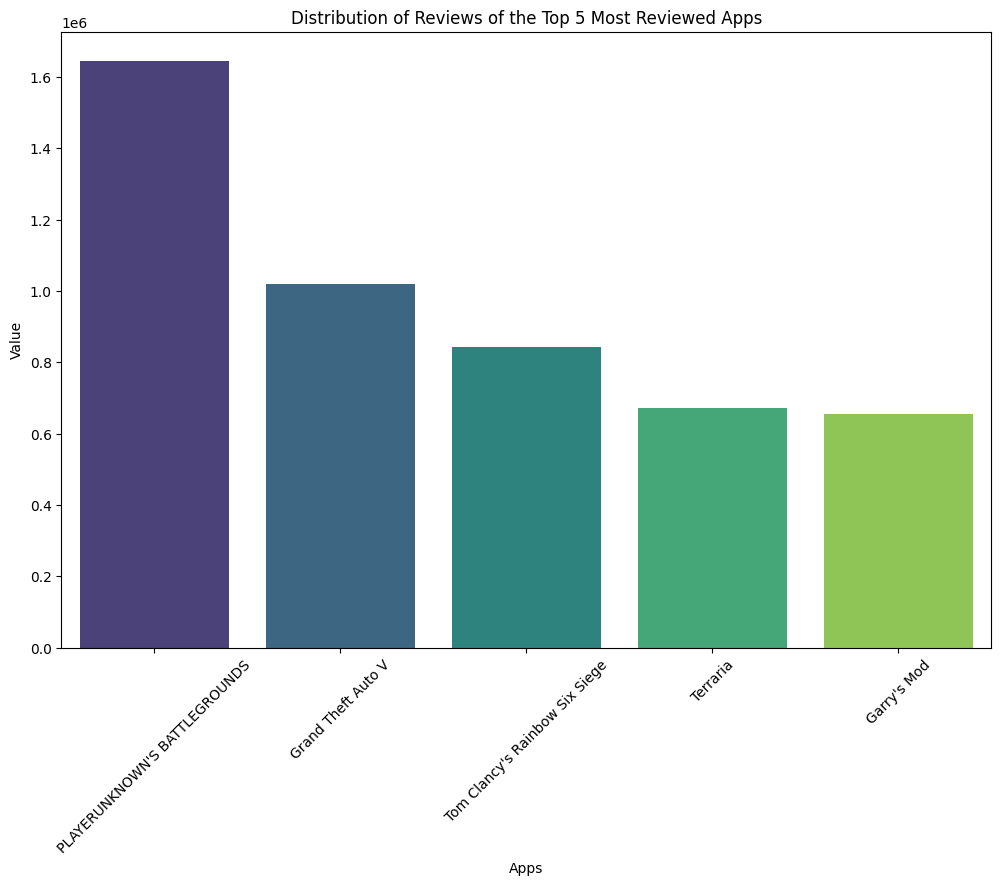

In [102]:
# Bar Plot Histogram
top_5_apps = df['app_name'].value_counts().head(5)

plt.figure(figsize=(12, 8))
sns.barplot(data = top_5_apps, palette='viridis')
plt.title('Distribution of Reviews of the Top 5 Most Reviewed Apps')
plt.xlabel('Apps')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

---
- We would like to know also who are the top 5 reviewers in Steam.

C:\Users\Marco\AppData\Local\Temp\ipykernel_17596\1202052364.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top_5_reviewers, palette='mako')


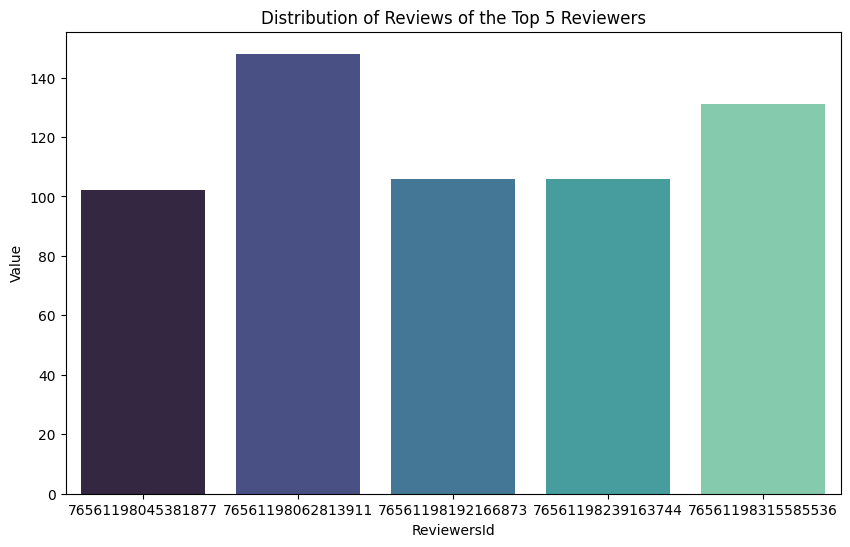

In [104]:
# We Calculate the first five reviewers per number of reviews in the dataset
top_5_reviewers = df['author.steamid'].value_counts().head(5)

# Create and Plot the figure
plt.figure(figsize=(10, 6))
sns.barplot(data = top_5_reviewers, palette='mako')
plt.title('Distribution of Reviews of the Top 5 Reviewers')
plt.xlabel('ReviewersId')
plt.ylabel('Value')
plt.show()

---
- The following BarPlot depicts every language found in the review dataset with its count of reviews where it was used.

C:\Users\Marco\AppData\Local\Temp\ipykernel_17596\3823190010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_by_review.index, y=language_by_review, palette='crest')


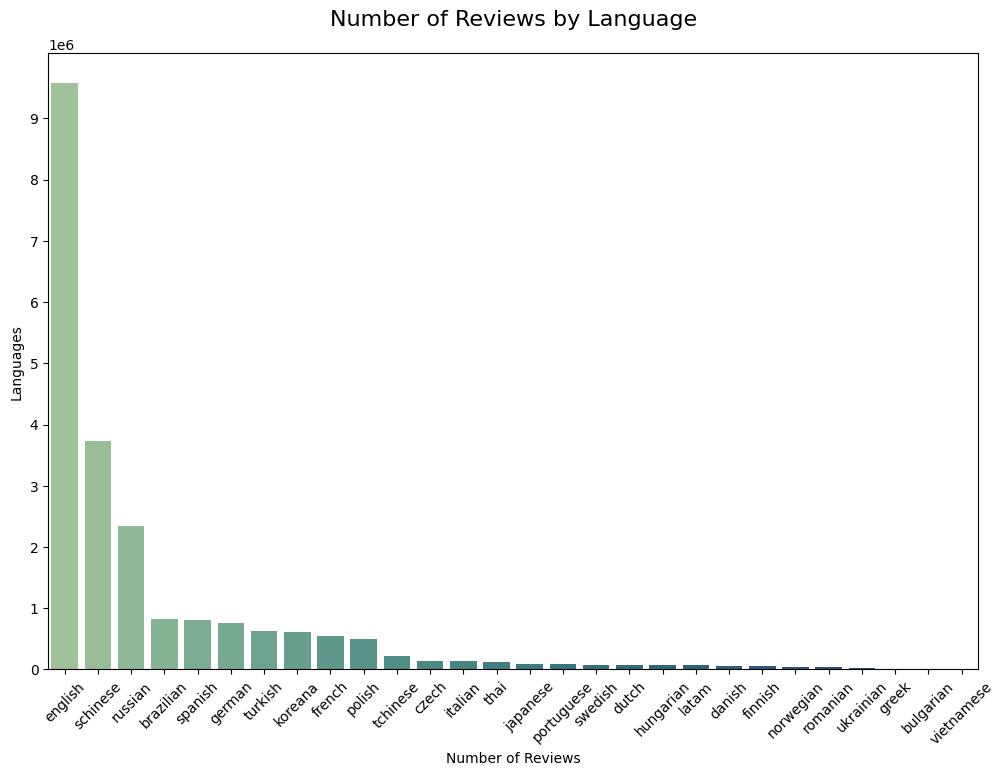

In [93]:
# Bar Plot
language_by_review = df['language'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=language_by_review.index, y=language_by_review, palette='crest')
plt.title('Number of Reviews by Language', fontsize=16, pad=20)
plt.xlabel('Number of Reviews')
plt.ylabel('Languages')
plt.yticks(ticks=range(0, language_by_review.max() + 1, 1000000)) 
plt.xticks(rotation=45)
plt.show()

---
- The Following heatmap visualizes the distribution of reviews across different days of the week and hours of the day. Each cell represents the count of reviews during a specific hour on a given day. 


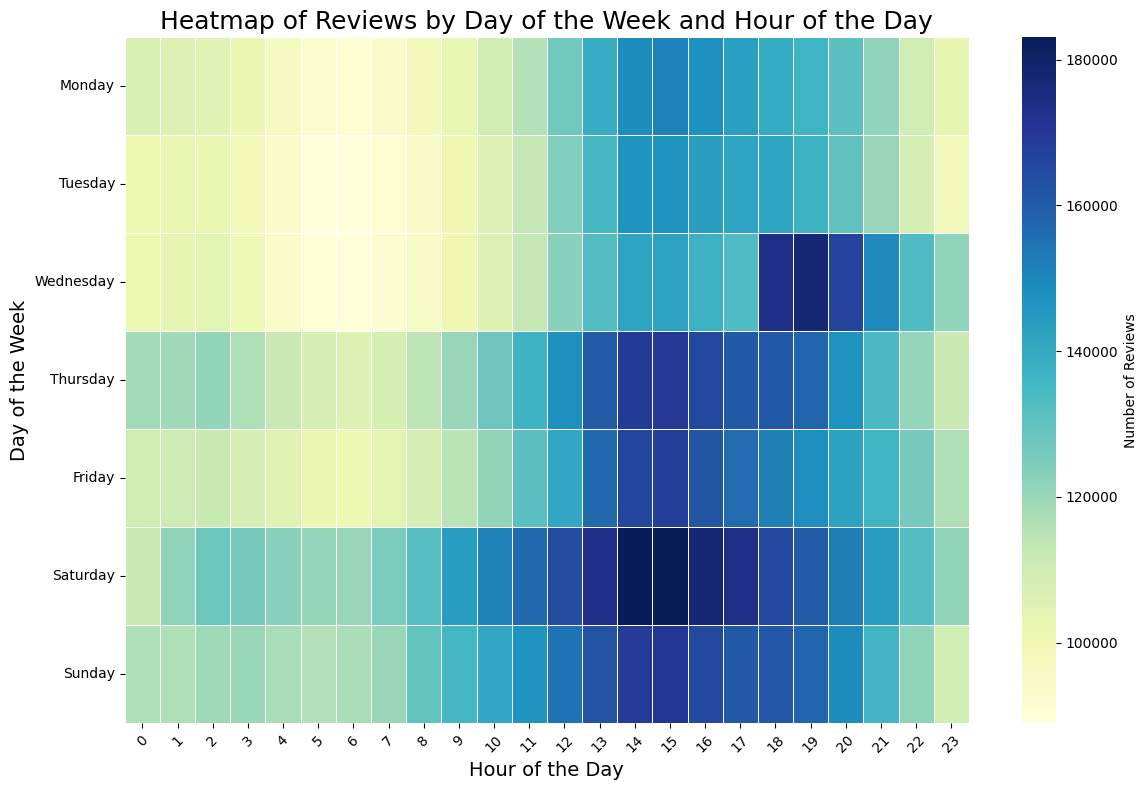

In [92]:
# Ensure the timestamp column is in datetime format
new_df_visual = df.copy()
new_df_visual['timestamp_created'] = pd.to_datetime(new_df_visual['timestamp_created'])

# Extract day of the week and hour from the timestamp
new_df_visual['day_of_week'] = new_df_visual['timestamp_created'].dt.day_name()  # Get the name of the day
new_df_visual['hour'] = new_df_visual['timestamp_created'].dt.hour  # Get the hour

# Count the number of reviews for each combination of day and hour
review_counts = new_df_visual.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Reorder the days of the week for correct heatmap display
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
review_counts = review_counts.reindex(ordered_days)

# Set up the figure and axes
plt.figure(figsize=(12, 8))
sns.heatmap(review_counts, cmap='YlGnBu', annot=False, fmt='d', linewidths=.5, cbar_kws={"label": "Number of Reviews"})

# Title and labels
plt.title('Heatmap of Reviews by Day of the Week and Hour of the Day', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


#### Key Observations:

- **Color Intensity**: The varying shades of color indicate the number of reviews, with darker shades typically representing higher counts. This allows for quick visual identification of peak review periods.
  
- **Trend Analysis**: By examining the heatmap, we can observe trends in user engagement. For instance, certain days may have significantly more reviews than others, suggesting a pattern in user activity.

- **Time Management**: This visualization can assist stakeholders in understanding when to focus their marketing efforts or manage server load, as it highlights peak times for user activity.


---
### **[RQ2] - Analysis of the Distribution of reviews**
---

1. Identify which applications have the highest and lowest number of reviews

The Function `highest_lowest_reviews_applications(df)` returns the App with the Most reviews and the App with the least reviews

In [ ]:

functions.highest_lowest_reviews_applications(df)


Top apps with the most reviews:
                                 count_reviews
app_name                                    
PLAYERUNKNOWN'S BATTLEGROUNDS        1644255

Top apps with the minimum reviews:
                  count_reviews
app_name                     
Neon Hardcorps            200



#### **Top App with Maximum Reviews**

- **App Name**: PLAYERUNKNOWN'S BATTLEGROUNDS
- **Total Reviews**: 1,644,255

**Observation**: PLAYERUNKNOWN'S BATTLEGROUNDS (PUBG) stands out as the most reviewed game in the dataset, with over 1.6 million reviews. This high volume of reviews indicates a significant level of engagement and interest from players, reflecting the game's popularity and its impact on the gaming community.

#### **App with Minimum Reviews**

- **App Name**: Neon Hardcorps
- **Total Reviews**: 200

**Observation**: In contrast, Neon Hardcorps has the lowest number of reviews in the dataset, totaling only 200. This could suggest that the game has either a smaller player base, limited visibility, or less engagement compared to more popular titles.


2. Plot the number of reviews for each application in descending order. What insights can you draw from the plot?


The `reviews_count_plot` function generates a bar plot visualizing the number of reviews for each application in the provided DataFrame `df`. 

1. **Grouping and Counting**: The function first groups the DataFrame by `app_name` and calculates the total number of reviews for each app, storing the results in a new DataFrame called `review_counts`.

2. **Sorting**: It then sorts the `review_counts` DataFrame in descending order based on the number of reviews, ensuring that the most reviewed applications appear at the top.

3. **Plotting**: Using Seaborn, the function creates a bar plot where the x-axis represents the application names and the y-axis represents the corresponding number of reviews. 

4. **Customization**: The x-axis labels are customized to show only the names of the most and least reviewed applications for clarity, with labels rotated for better readability.


c:\Users\Marco\Desktop\Data Science Magistrale\ADM\ADM-HW2\ADM-HW2\functions.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  #Create the bar plot with x = 'app_name' and y = 'count_reviews'


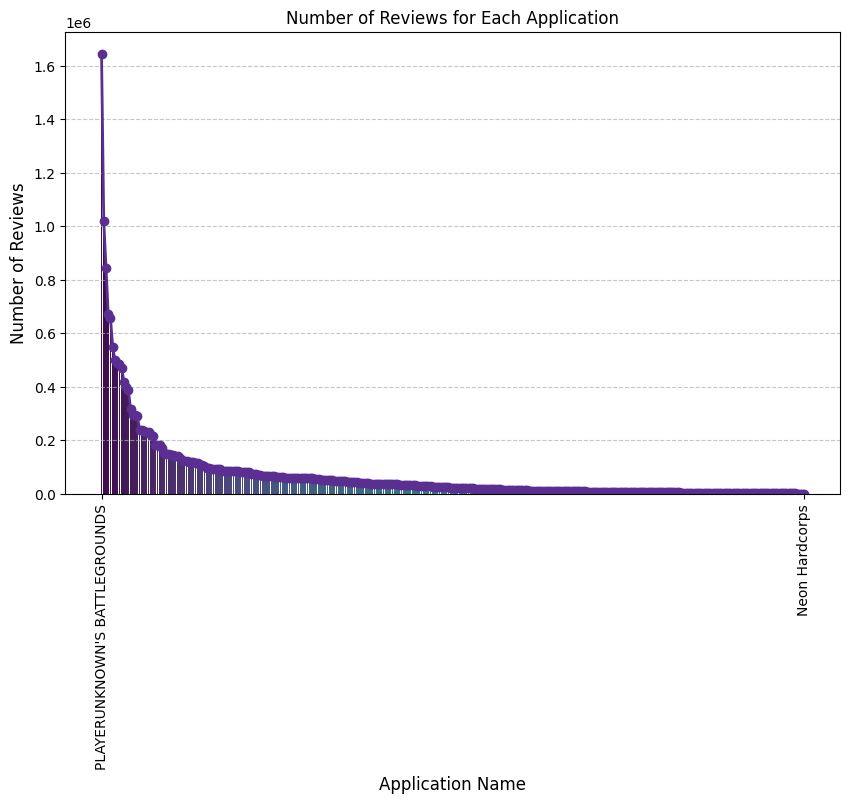

In [101]:
functions.reviews_count_plot(df)

- Like we have seen in the previous exercise, **PLAYERUNKNOWN'S BATTLEGROUNDS** and **Neon Hardcorps** are the Apps with the most and the least reviews.
---

3. For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.


- The Function `puchased_gratis_reviewers(df)` calculates the percentage of reviewers who purchased or received for free the top 5 most reviewed apps from a dataset, filtering by the Top 5 most reviewed apps and then counting the number of reviewers that purchased the app (grouping by the app) and dividing by the total number of reviews. It does the same for the percentage of th reviewers that purchased the app for free.


In [105]:
functions.puchased_gratis_reviewers(df)

Percentage of Reviewers that purchased the app for the Top 5 Most Reviewed Apps:
                                 percentage_of_purchase_reviewers
app_name                                                        
Garry's Mod                                                84.09
Grand Theft Auto V                                         88.83
PLAYERUNKNOWN'S BATTLEGROUNDS                              83.49
Terraria                                                   78.44
Tom Clancy's Rainbow Six Siege                             83.44
Percentage of Reviewers that received for free the app for the Top 5 Most Reviewed Apps:
                                 percentage_of_free_reviewers
app_name                                                    
Garry's Mod                                             3.78
Grand Theft Auto V                                      3.79
PLAYERUNKNOWN'S BATTLEGROUNDS                           3.74
Terraria                                                3.00
Tom Cla

### Percentage Breakdown of Reviewers for the Top 5 Most Reviewed Apps

#### 1. Percentage of Reviewers That Purchased the App

| App Name                                    | Percentage of Purchase Reviewers |
|---------------------------------------------|-----------------------------------|
| Garry's Mod                                | 84.09%                            |
| Grand Theft Auto V                         | 88.83%                            |
| PLAYERUNKNOWN'S BATTLEGROUNDS              | 83.49%                            |
| Terraria                                   | 78.44%                            |
| Tom Clancy's Rainbow Six Siege             | 83.44%                            |

#### 2. Percentage of Reviewers That Received the App for Free

| App Name                                    | Percentage of Free Reviewers      |
|---------------------------------------------|-----------------------------------|
| Garry's Mod                                | 3.78%                             |
| Grand Theft Auto V                         | 3.79%                             |
| PLAYERUNKNOWN'S BATTLEGROUNDS              | 3.74%                             |
| Terraria                                   | 3.00%                             |
| Tom Clancy's Rainbow Six Siege             | 4.31%                             |

### Analysis of Similarities and Differences

1. **High Purchase Rates**: 
   - All five games have a high percentage of reviewers who purchased the game, ranging from **78.44% to 88.83%**. This indicates a strong customer base that is willing to buy these titles rather than obtaining them for free. 
   - **Grand Theft Auto V** stands out with the highest purchase percentage at **88.83%**, while **Terraria** has the lowest at **78.44%**.

2. **Low Free Access**: 
   - The percentage of reviewers who received the game for free is remarkably low across all titles, ranging from **3.00% to 4.31%**. This suggests that these games are primarily acquired through purchases, which may reflect their value and demand in the market.
   - **Terraria** has the lowest percentage of free access at **3.00%**, while **Tom Clancy's Rainbow Six Siege** has the highest at **4.31%**.

3. **Similar Trends**: 
   - The purchase rates are consistently high while the free access rates remain low, showing a correlation between the perceived value of these popular games and the purchasing behavior of the reviewers. 
   - The small differences in percentages indicate that despite variations in specific titles, the overall trend among the top five reviewed apps reflects a common behavior among users preferring to purchase rather than receive for free.



4. Which applications have the most and the least user recommendations? Summarize your findings.


- The function `most_least_recommended_reviews_applications` identifies the most and least recommended apps from a dataset based on user recommendations.


In [ ]:
functions.most_least_recommended_reviews_applications(df)

app_name
PLAYERUNKNOWN'S BATTLEGROUNDS    886417
Name: recommended, dtype: int64
Most recommended apps:
                                 count_of_recommended_reviews
app_name                                                   
PLAYERUNKNOWN'S BATTLEGROUNDS                        886417

Least Recommended apps:
                  count_of_recommended_reviews
app_name                                    
Neon Hardcorps                            89



##### **Findings**

- **Most Recommended App**:  
  - **PLAYERUNKNOWN'S BATTLEGROUNDS** has the highest number of recommendations, with a total of **886,417** reviews endorsing the app. This suggests that it is highly regarded among players, indicating strong user satisfaction and appeal.

- **Least Recommended App**:  
  - **Neon Hardcorps** stands out as the least recommended app, with only **89** recommendations. This low figure may reflect poor user experience or dissatisfaction, highlighting a significant gap in user approval compared to more popular titles.

These findings illustrate a clear contrast in user sentiment, with **PLAYERUNKNOWN'S BATTLEGROUNDS** enjoying substantial popularity while **Neon Hardcorps** appears to struggle with acceptance in the market.

---


5. Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.


We have to underline (if exists) a possible correlation between two feature, so we'll focus our analysis on the relationship between this two columns:
* ```recommended```
* ```review_scores```: 
    we define it as the normalized value in $[1,10]$ of the number of the sum of recommendation for each app divided by the total reviews


To achieve that, we compute the **Person coefficient**.
The Pearson correlation coefficient measures the strength and direction of the linear relationship between two continuous variables. 
* ```Coefficient Interpretation```:
    * $r=1$: Indicates a perfect positive linear relationship. If one variable increases, the other increases proportionally.
    * $r=−1$: Indicates a perfect negative linear relationship. If one variable increases, the other decreases proportionally.
    * $r=0$: Indicates no linear relationship. There is no linear correlation between the two variables.

The p-value indicates the statistical significance of the correlation.     
* ```P-value```:    
    * *P-value* $< 0.05$: Indicates a statistically significant correlation. In this case, we can reject the null hypothesis and conclude that there is a correlation between the variables.
    * $0.05 ≤$ *P-value* $< 0.10$: Indicates a marginally significant correlation.
    * *P-value* $ ≥ 0.10$: Indicates that there is not enough evidence to reject the null hypothesis. We cannot conclude that there is a significant correlation.

c:\Users\Marco\Desktop\Data Science Magistrale\ADM\ADM-HW2\ADM-HW2\functions.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


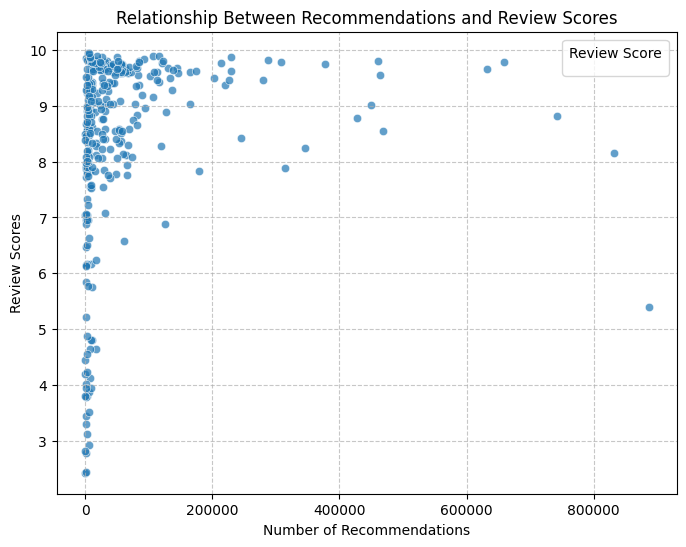

Pearson correlation coefficient: 0.15, p-value: 0.0069
There is a statistically significant linear correlation (Pearson).


In [110]:
functions.statistical_correlation(df)

Seen that the p-value is smaller than 0.05 we can say that there is linear correlation between the two columns

---
### **[RQ3] - Date and Time**
---

1. Plot the number of reviews submitted each month and describe any trends.


In [62]:
df['timestamp_created']=pd.to_datetime(df['timestamp_created'], unit='s') 
print(df['timestamp_created'])


df['month'] = df['timestamp_created'].dt.month #extract the month from timestamp_created
print(df['month'])



monthly_rev=df.groupby('month').size() #count the number of reviews per month 
print(monthly_rev)



peaks=monthly_rev[ monthly_rev==monthly_rev.max()] #identify peaks
print(peaks)

troughs= monthly_rev[ monthly_rev==monthly_rev.min()] #identify lower engagement periods
print(troughs)

0          2021-01-23 06:00:29
1          2021-01-23 05:50:30
2          2021-01-23 05:46:40
3          2021-01-23 05:32:50
4          2021-01-23 05:23:47
                   ...        
21747371   2020-03-23 18:05:04
21747372   2020-03-23 18:04:53
21747373   2020-03-23 18:04:33
21747374   2020-03-23 18:03:51
21747375   2020-03-23 18:01:45
Name: timestamp_created, Length: 21612444, dtype: datetime64[ns]
0           1
1           1
2           1
3           1
4           1
           ..
21747371    3
21747372    3
21747373    3
21747374    3
21747375    3
Name: month, Length: 21612444, dtype: int32
month
1     2117512
2     1330603
3     1512060
4     1310124
5     1290852
6     1923560
7     1881550
8     1259053
9     1206589
10    1476071
11    3736292
12    2568178
dtype: int64
month
11    3736292
dtype: int64
month
9    1206589
dtype: int64


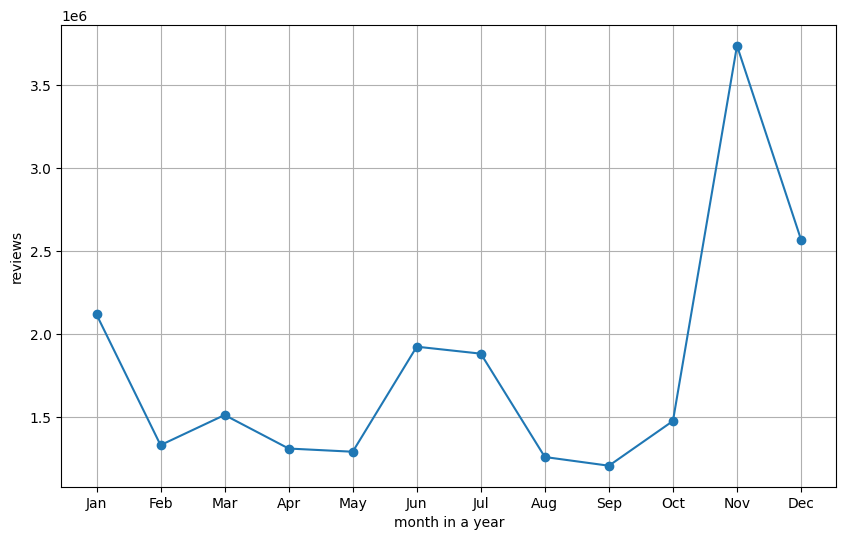

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
monthly_rev.plot(kind='line', marker='o')
plt.xlabel("month in a year")
plt.ylabel("reviews")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

2. Identify any seasonal patterns or trends in review activity. Explain any seasonal impact you notice.


* The overall trend in monthly review activity shows notable fluctuations throughout the year, with the highest peak in reviews occurring around November and the lowest point observed in September. This suggests that review activity is not steady; instead, it increases and decreases at different points throughout the year.The overall trend in the number of reviews each month is not consistent; it fluctuates, increasing and decreasing throughout the year.

* The highest number of reviews is recorded during the winter season. In spring, review activity decreases, only to rise again in summer. Starting in August, there’s a sharp decline in reviews, but this trend reverses in October and November as review activity picks up once more with the onset of winter.

3. Determine if certain times of the year have higher engagement rates. Describe noticeable peaks in user activity.


In [64]:
df['hour'] = df['timestamp_created'].dt.hour #extract the hour from timestamp_created
print(df['hour'])
print(df['hour'].max()) 

0            6
1            5
2            5
3            5
4            5
            ..
21747371    18
21747372    18
21747373    18
21747374    18
21747375    18
Name: hour, Length: 21612444, dtype: int32
23


In [65]:
df['hour'] = df['timestamp_created'].dt.strftime('%H:%M')
time_reviews = df.groupby('hour')['review_id'].count().reset_index() #count the number of reviews per hour 
print(time_reviews)

       hour  review_id
0     00:00      12713
1     00:01      12585
2     00:02      12689
3     00:03      12883
4     00:04      12656
...     ...        ...
1435  23:55      12708
1436  23:56      12676
1437  23:57      12690
1438  23:58      12845
1439  23:59      12733

[1440 rows x 2 columns]


4. What is the most common time of day users write reviews? For example, users might typically write reviews at 17:44. Explain how this time distribution could influence your analysis.


In [66]:
most_common_time = time_reviews.loc[time_reviews['review_id'].idxmax(), 'hour']
most_common_count = time_reviews['review_id'].max()
print(f'The most common time for submitting reviews is at {most_common_time} with {most_common_count} reviews.')

The most common time for submitting reviews is at 14:50 with 19362 reviews.


In [67]:
least_common_time = time_reviews.loc[time_reviews['review_id'].idxmin(), 'hour']
least_common_count = time_reviews['review_id'].min()
print(f'The least common time for submitting reviews is at {least_common_time} with {least_common_count} reviews.')

The least common time for submitting reviews is at 06:20 with 11573 reviews.


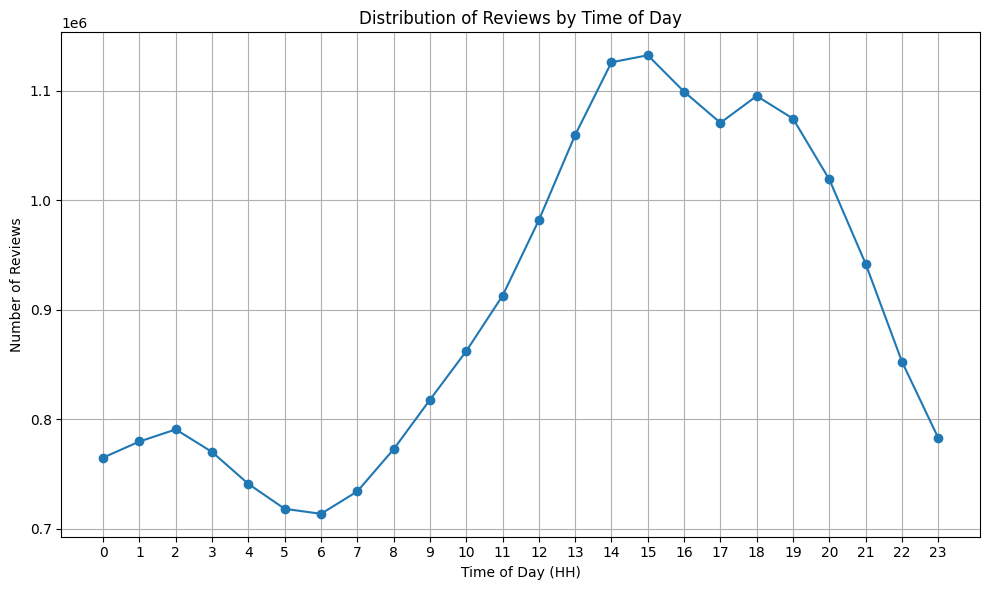

In [68]:
df['timestamp_created'] = pd.to_datetime(df['timestamp_created'])  
df['hour'] = df['timestamp_created'].dt.hour  

hour_reviews = df.groupby('hour').size()
#graphic rapresentation
plt.figure(figsize=(10, 6))
plt.plot(hour_reviews.index, hour_reviews.values, marker='o')
plt.xticks(range(0,24))
plt.xlabel('Time of Day (HH)')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Reviews by Time of Day')
plt.tight_layout()
plt.grid(True)
plt.show()

5. Create a function that accepts a list of time intervals and plots the number of reviews for each interval.


In [69]:
def tr_rev(df,intervals):
    df['timestamp_created'] = pd.to_datetime(df['timestamp_created'])
    df['hour'] = df['timestamp_created'].dt.hour
    df['minute'] = df['timestamp_created'].dt.minute
    l=[]
    for (start, end) in intervals:
        i = (df['hour'] >= start) & (df['hour'] < end)
        j = df[i].shape[0]
        l.append(j)
        print(f"Interval {start}:00 - {end}:00: {j} recensioni")
    interval_labels = [f"{start}:00-{end}:00" for (start, end) in intervals]
    
    
    plt.figure(figsize=(10, 6))
    plt.bar(interval_labels, l, color='skyblue')
    plt.xlabel('time intervals')
    plt.ylabel('number of reviews')
    plt.title('Distribution of Number of Reviews by Time Interval')
    plt.xticks(rotation=45)
    plt.show()


6. Use the function to plot the number of reviews for the following time intervals:

| Initial Time | Final Time |
|--------------|------------|
| 00:00:00     | 02:59:59   |
| 03:00:00     | 05:59:59   |
| 06:00:00     | 10:59:59   |
| 11:00:00     | 13:59:59   |
| 14:00:00     | 16:59:59   |
| 17:00:00     | 19:59:59   |
| 20:00:00     | 23:59:59   |


Interval 0:00 - 2:00: 1544711 recensioni
Interval 3:00 - 5:00: 1511112 recensioni
Interval 6:00 - 10:00: 3038257 recensioni
Interval 11:00 - 13:00: 1894421 recensioni
Interval 14:00 - 16:00: 2258003 recensioni
Interval 17:00 - 19:00: 2165617 recensioni
Interval 20:00 - 23:00: 2813423 recensioni


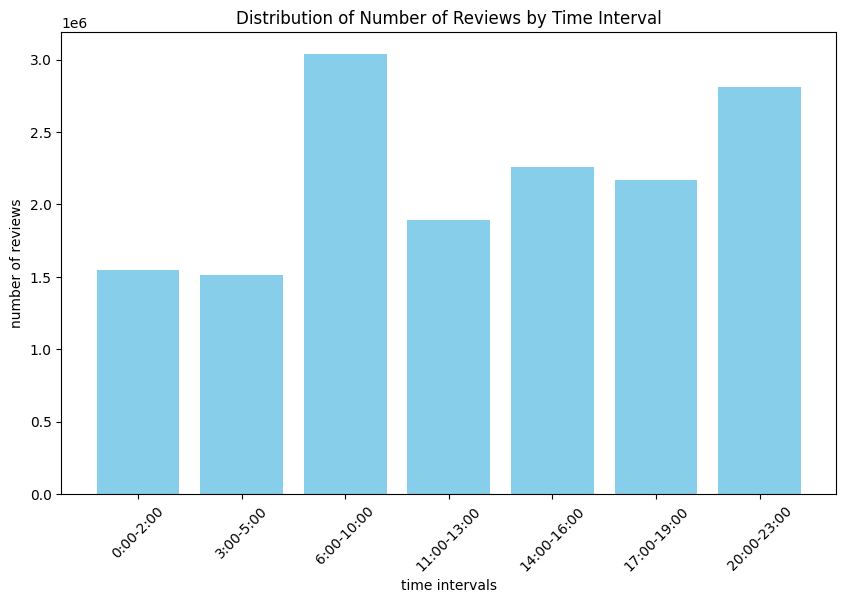

In [70]:
intervals = [(0, 2), (3, 5), (6, 10), (11, 13), (14, 16), (17, 19), (20, 23)]
tr_rev(df, intervals)

---
### **[RQ4] - Investigating whether users who spend more time using an application give higher or lower ratings.**
---

1. Analyze the relationship between the amount of time a user has spent on an application and their review score.

The stam market does not have a complex review system, a user can evaluate the app as raccomended or not raccomended.
This creates a conondrum when tring to evaluate the review score.
Our answer is to evaluate the review score as the total sum of the interacion of the review, as the helpfull votes and the likes, pass them trough a robust scaling to reduce the effect of outliers on the distribution and normalize the socre between 0 and 10.
The review score is plotted against the play time at the moment of the review, wich is considered expressed in second and transformed into hours.

In [ ]:
# get the posisitive and negative revies to see the individual distribution
# the sintax is: from df get the rows where reccomended is true and from that get as a copy of df the listed columns
neg_val = df[df["recommended"]==False][['votes_helpful', 'author.playtime_at_review', "votes_funny", "author.playtime_forever"]].copy()
pos_val = df[df["recommended"]==True][['votes_helpful', 'author.playtime_at_review', "votes_funny", "author.playtime_forever"]].copy()

# initialize the relevance of the reviews
neg_val.loc[:,"review_score"] = (neg_val.votes_funny + neg_val.votes_helpful)
pos_val.loc[:,"review_score"] = (pos_val.votes_funny + pos_val.votes_helpful)

# in this funtion we do a rubust scaing so the outliars don't weight too  mutch on the other values
# then i do min max normalization with the numeator multiplied by 10 to have a review score robust scaled in a 0-10 range
# the output is the play time at review, that is considered in seconds, formatted to hours and thereview score
neg_val = time_vs_relevance(neg_val)
pos_val = time_vs_relevance(pos_val)

# these function create dotplots of review interaction over time spent playing the game
plot_time_vs_revewscore(pos_val, "Positive")
plot_time_vs_revewscore(neg_val, "Negative")

2. Do more experienced users (who have used the application longer) tend to give higher or lower ratings? Comment on any trends you observe.

From these plot it can be observed that reviews written after a short play-time recive morer visibility in comparison to reviews with more time spent playinjg the game, this may be because games get notoriety as time passes and so consumers have a good base understanding of a game before buying it. Although notoriety may be present only with bigger games also smaller games made by individual creators have many content on various platforrm showcasing the game and so interacting with the review themself is not usefull. This create a phenomenon where reviews done near the relese of a game have more imporrtance than reviews published after.
It is also interesting to see that the maximum play-time is lower in the negative reviews than in the positive, as people will not play a bad game for prolonged periods. nevetheless 600 hours on a bad game seems excessive and the explanation could be that games recive constant updates forr new content that may be bad, and if the game get's worse over time it can accumulate bad reviews from users with more game time.
last but not least, it is verry interresting to see that there are more interacion with negative reviews than with positive, the explanation may be that people made fun of the game with a colorfull remark and people found it funny.

3. Plot the distribution of review scores based on different user experience levels (e.g., new users vs. veteran users). Is there a statistical difference in the score distributions?
Use an appropriate statistical test to validate your hypothesis.

To evaluate the experience of a gamer we use as a mesure the total time spent gameing, and since we need two groups we split at the median, it is not particularly important how this step is done as all important reviews are from new users as it can be seen in the plot.
The review score is the same from the previews point, to differentiate between raccomanded and not raccomanded we decided to give negative reviews a negative score. The plot will be from -10 heavy negative review to 10 a heavy positive review, 0 being a non relevant review.

For the statistical test we used the Mann-Whitney U Test as the dependent variable is skewed, but not normally distributed. We want to compare the central tendency, or rank, of the two groups instead of their means. As this test looks at the relative ordering of values rather than the mean values themselves. this can give infoirmation about the difference of values in the two distributions, so if a groups contain larger or smaller values than the other.

In [ ]:
# create a dataframe for the experience as total play-time actross all games against the review
experience= pd.DataFrame()

# get the review score,  negative for notr reccomended and positive for raccomended, and the author total playtime across games
experience= pd.concat([(neg_val*-1)[["review_score", "author.playtime_forever"]], pos_val[["review_score", "author.playtime_forever"]]])

plot_experience_vs_reviewscore(experience)


# here i divide the distribution by the median to get user with lower experience and user with more experience
mid_point = np.median(experience.play_time)
low_exp = experience[experience.play_time < mid_point].score
high_exp = experience[experience.play_time >= mid_point].score

# Mann-Whitney U Test
t_stat, p_value = mannwhitneyu(low_exp, high_exp) # will return the value in reference of the low experience

print("score U-statistic:", t_stat) # 56873312167435.5
# The high value means that the low_experienced user have a extreamly higher values in the distribution compared to the highly experienced, as can be seen in the graph.

print("score P-value:", p_value) # 0.0
# A 0 p-value menas that the null hypotesis can be absolutely demolished, there is no shadow of a doubt that the new users have better reviews than the veteran users.

4. Ask an LLM tool (ChatGPT, Claude AI, etc.) to interpret the statistical results of the analysis and provide potential explanations for the trends. Does the LLM suggest additional factors that could explain why users who spend more time on the app give higher or lower ratings? How can you validate the interpretations provided by the LLM?

The LLM suggests several additional factors that could explain why users who spend more time on the app give higher or lower ratings:

1. **Review Motivation Differences**: New users may feel more enthusiastic about sharing their experiences, leading to emotionally charged reviews that attract more engagement.

2. **Social Validation or Novelty Effect**: New users often seek validation for their experiences, resulting in more engaging reviews, while the novelty of their gaming experience can further heighten interactions.

3. **Veteran Users' Review Style**: Veteran users might adopt a more tempered review style, which may receive less attention compared to the passionate reviews of newer players.

4. **Community Dynamics**: Other players may resonate more with new users' first impressions, leading to increased interaction, while veteran reviews might be perceived as less relatable.

5. **Game-Specific Effects**: The community engagement around certain games may disproportionately raise interaction scores for new users, impacting overall trends in review ratings.

To validate the interpretations provided by the LLM, consider the following approaches:

1. **Statistical Analysis**: Conduct additional descriptive statistics and effect size calculations to assess the significance and magnitude of differences in interaction scores between new and veteran users.

2. **Content Analysis**: Analyze the content of reviews to identify themes and patterns that support the interpretations, focusing on emotional language versus analytical writing styles.

3. **Engagement Metrics**: Examine community interaction metrics (likes, comments) in relation to review ratings and user experience levels to assess community dynamics.

4. **Control Variables**: Account for confounding factors (e.g., game popularity, genre) to isolate the effects of user experience on review behavior.


---
### **[RQ7] - Probability and Statistical Tests**
---

1. What is the probability of submitting a review and receiving at least one helpful vote from other users?


Through the **complement rule** we know that the probability of an event is equal to \( 1 - the probability of its complementary event\)

Formally:

If \($A$\) is an event, then the probability of \($A$\), denoted P(A), is given by:

$P(A) = 1 - P(A^c)$


where \($A^c$\) represents the complement of \($A$\) (i.e., the event that occurs when \($A$\) does not occur).

##### **Explanation**
- In this case, the probability of receiving at least one helpful votes from other users for each review is equal to 1 - the probability of receiving zero helpful votes from other users for each review.
- The probability of receiving zero helpful votes from other users for each review by the definition of probability is the number of the reviews with zero votes divided by the number of total reviews. 


In [35]:
1 - functions.probability_one_helpful_vote(df)

0.23520355360389988

2. What is the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app?

Given $A$ the event representing the probability of receiving at least one helpful vote from other users,  the probability of submitting a review and receiving at least one helpful vote from other users, given that you don’t recommend the app (event $R$) is equal to:
$$ P(A|R) = \frac{P(A ∩ R)}{P(R)}$$
The Two Probabilities can be computed again through the definition of probability of an event A:
$$ P(A) = \frac{| number\,of\, favourable\,  outcomes\,  | }{| Total\,  number\,  of\,  outcomes\,  |} $$
But this time, for the denominator and numerator, we can check that the Total number of outcomes is the same because its the number of total reviews, so we can equate the first equation to the following:
$$ P(A | R) = \frac{| number\,  of\,  rows\,  where\,  both\,  the\,  event\,  A\,  and\,  R\,  occur\,  | }{|  number\,  of\,  rows\,  where\,  the\,  event\,  R\,  occurs\,   |} $$


In [37]:
functions.conditional_probability_recommended(df)

0.42326108414956315

3. Is the probability of “a review receiving at least one helpful vote” independent of the probability that “the reviewer has submitted at least five reviews before the current review”? Elaborate on it.


To check the independence of two events A and B in probability we can use the **Property of Independence**:
$$ P(A ∩ B) = P(A)*P(B) $$
* But In real-world data, the assumption of perfect independence often doesn’t hold due to noise, sampling errors, or complex underlying patterns. <br>
Directly checking $P(A ∩ B) = P(A) * P(B)$ might lead to misleading conclusions, especially in large datasets where slight discrepancies from exact equality are common.

For this reason, we prefer using the **Chi-Square test** that  is very common for testing the independence between two categorical variables using a contingency table analysis.

In [49]:
functions.check_probability_independence(df)

Chi-Square Test: Chi2=57016.11760344674, p-value=0.0
The two events are NOT independent (significant at 95%)


4. We hypothesize that “reviewers who own a larger number of games are likely to leave fewer reviews on the platform.” Please validate or refute this statement through statistical analysis.


The hypothesis suggests an **inverse relationship** between the number of games owned and the number of reviews submitted. This means we expect that as the number of games owned increases, the number of reviews submitted decreases.
So we'll focus our analysis on the relationship between this two columns:
* ```author.num_games_owned```
* ```author.num_reviews```

To achieve that, we compute the **Person coefficient** through the function `pearsonr()`.


In [52]:
functions.check_correlation(df)

       author.num_games_owned  author.num_reviews
count            1.240656e+07        1.240656e+07
mean             1.418063e+06        7.089912e+05
std              2.497262e+09        1.765831e+09
min              0.000000e+00        1.000000e+00
25%              1.300000e+01        1.000000e+00
50%              3.800000e+01        2.000000e+00
75%              9.600000e+01        4.000000e+00
max              4.398047e+12        4.398047e+12
Pearson correlation coefficient: -2.2798371763833485e-07 p-value: 0.9993592782120561



We can see from the output of the function that the relationship between the two columns is very weak, underlined by the distance of the **p-value** ≈ 0.99 and **Pearson coefficient** ≈ 0.
___

5. Ask an LLM tool (such as ChatGPT, Claude AI, Gemini, Perplexity, etc.) to understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis. Are those results trustworthy, or can you do something to improve somehow the confidence in the suggestions given by the LLM?

This was the question i asked to ChatGPT:
* *"Understand the purposes of histograms, bar plots, scatterplots, and pie charts and what kind of insights they offer that might be useful for statistical analysis"*

This was what the LLM has responded to me:

##### **1. Histograms** 
**Purpose**:
* A histogram is used to visualize the distribution of a dataset by showing the frequency of data points within specified ranges (bins).

**Insights Offered**:

* **Distribution Shape**: Shows whether the data is normally distributed, skewed, or has outliers.
* **Central Tendency**: Provides a visual indication of the mean, median, and mode.
* **Spread**: Helps in understanding the variability in the data, showing where most data points lie and the range of values.
* **Frequency**: Indicates how many observations fall into each range, helping to identify peaks and gaps in the data.

**Use Cases**:
* Analyzing the distribution of test scores, age distribution in a population, or income levels.

##### **2. Bar Plots**
**Purpose**:
* A bar plot (or bar chart) is used to compare different groups or categories by representing their values with bars of different lengths.

**Insights Offered**:
* **Comparison Across Categories**: Easily compares the size of different categories, showing which is larger or smaller.
* **Trends Over Time**: If using a time-based categorical variable, bar plots can illustrate how values change over time.
* **Relative Size**: Helps in understanding the proportional differences among groups.

**Use Cases**:
* Comparing sales across different products, customer satisfaction scores by service type, or survey responses by demographic groups.

##### **3. Scatterplots**
**Purpose**:

* A scatterplot displays values for two different variables on a two-dimensional graph, allowing for the examination of relationships and correlations between them.
**Insights Offered:**

* **Correlation:** Shows the strength and direction of a relationship between two variables (positive, negative, or none).
* **Outliers:** Helps identify any unusual data points that deviate significantly from the trend.
* **Clustering:** Indicates if data points naturally group into clusters, which can suggest the presence of subgroups within the data.
**Use Cases:**

* Analyzing the relationship between hours studied and exam scores, or income versus spending on luxury goods.

##### **4. Pie Charts**
**Purpose:**

* A pie chart is used to show the proportions of a whole, displaying categorical data in slices.

**Insights Offered:**

* **Composition:** Illustrates the parts of a whole, helping to visualize how individual categories contribute to the total.
* **Proportional Relationships:** Useful for showing relative sizes among categories, especially when there are only a few categories.

**Use Cases:**

* Showing market share of companies, demographic breakdown of a population, or budget distribution across departments.  



| Chart Type   | Best For                           | Insights Offered                                   |
|--------------|------------------------------------|---------------------------------------------------|
| Histograms   | Distribution of continuous data    | Distribution shape, central tendency, variability  |
| Bar Plots    | Comparing categorical data         | Size comparison, trends, relative sizes           |
| Scatterplots | Relationships between two variables | Correlation, outliers, clustering                  |
| Pie Charts   | Proportional representation        | Composition, proportional relationships            |




##### **Conclusion**
I agree with the results given by the LLM, in this exercise we can see from the table that the plot that would suit the most would be the Scatter Plot to underline the correlation between the columns *author.num_games_owned* and *author.num_reviews*.

---


### **Bonus**

1. Perform sentiment analysis on the review texts in the top 3 languages and classify them as positive, negative, or neutral.

In [113]:
df_sentiment_analysis = functions.sentiment_classification(df)
df_sentiment_analysis.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,month,hour,minute,sentiment
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,1611379970,True,0,0,...,5,3,5587.0,3200.0,5524.0,1.611384e+09,1,5,32,positive
5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",2021-01-23 05:21:04,1611379264,True,0,0,...,11,1,823.0,823.0,823.0,1.611379e+09,1,5,21,positive
6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",2021-01-23 05:18:11,1611379091,True,0,0,...,27,2,4192.0,3398.0,4192.0,1.611352e+09,1,5,18,neutral
18,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,2021-01-23 03:38:06,1611373086,True,0,0,...,33,1,23329.0,177.0,23329.0,1.611219e+09,1,3,38,positive
20,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,2021-01-23 03:19:38,1611371978,True,0,0,...,131,2,8557.0,2004.0,8557.0,1.611371e+09,1,3,19,neutral


2. What is the distribution of sentiment across all reviews?


Sentiment Distribution (in %):
sentiment
positive    69.682013
neutral     15.409454
negative    14.908533
Name: proportion, dtype: float64


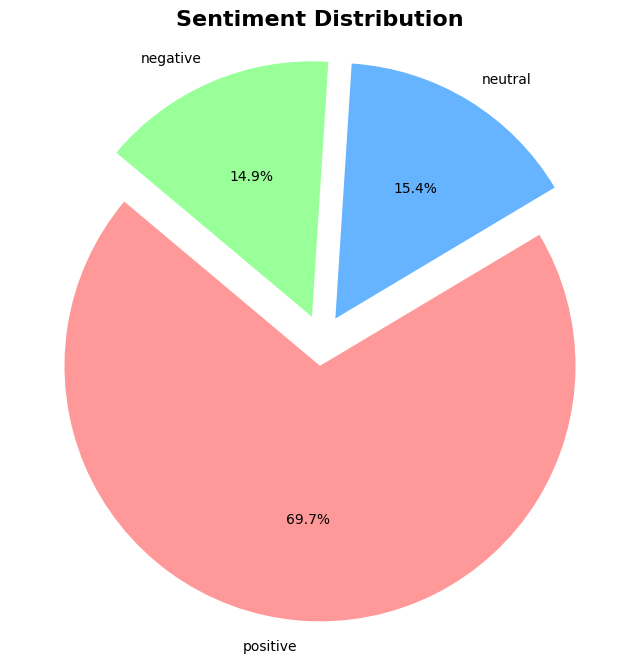

In [114]:
functions.compute_distribution(df_sentiment_analysis)

3. Does the sentiment analysis align with whether the application is recommended or not? Explain any insights from this comparison.


In [19]:
functions.comparison_sentiment_recommendations(df_sentiment_analysis)

Sentiment Distribution by Recommendation:
sentiment    negative  neutral  positive
recommended                             
False          533073   138229    379258
True           897518  1341665   6328940

Sentiment Percentage by Recommendation:
sentiment     negative    neutral   positive
recommended                                 
False        50.741795  13.157649  36.100556
True         10.475083  15.658797  73.866120


4. Is there a correlation between the sentiment of a review and the number of helpfulness votes it receives? Provide an analysis of the results and discuss potential trends.


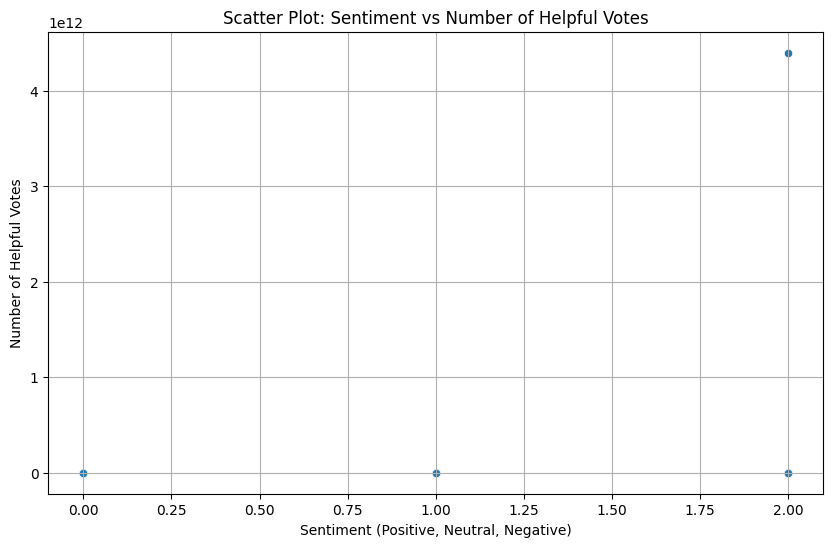

In [20]:
functions.correlation_sentiment_helpful_votes(df_sentiment_analysis)

---
### **Algorithmic Question (AQ)**
---

In [21]:
#TO DO
functions.algorithmic_question()

TypeError: algorithmic_question() missing 2 required positional arguments: 'n' and 'k'